#  Subject 1: CO2 concentration in the atmosphere since 1958

In [1]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
# Téléchargement et chargement des données
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

In [3]:
# Charger les données à partir d'un fichier CSV local
data_file = "weekly_in_situ_co2.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
# Charger les données dans une table de pandas
# data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], index_col=[0], names = ['Date', 'Concentration'])
data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], names = ['Date', 'Concentration'])
# Affichage des premières lignes des données pour vérification
print(data.head())

        Date  Concentration
0 1958-03-29         316.19
1 1958-04-05         317.31
2 1958-04-12         317.69
3 1958-04-19         317.58
4 1958-04-26         316.48


In [5]:
# Toutes les lignes contenant au moins une valeur nulle (NaN) dans une colonne sont supprimées
# data_subset = data.dropna()

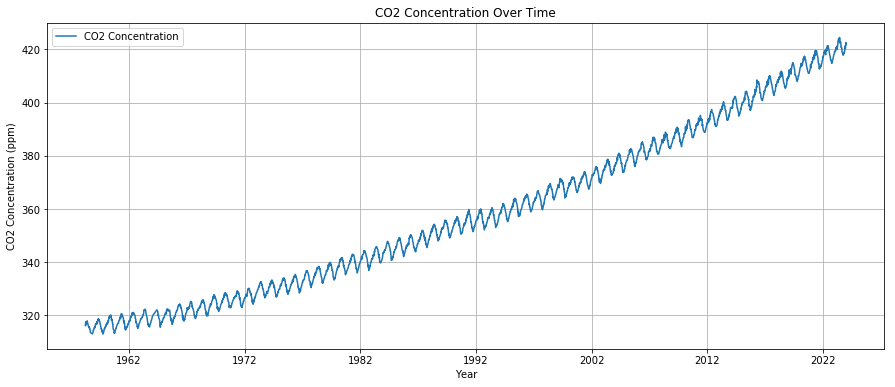

In [6]:
# Réalisation du graphique complet
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Concentration'], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

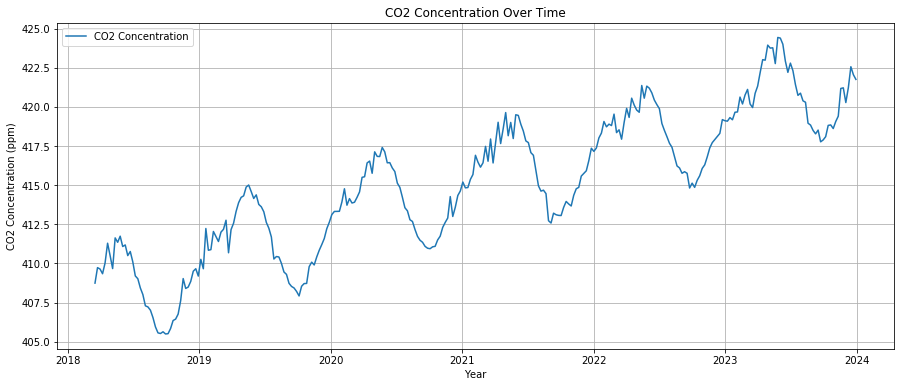

In [7]:
# Réalisation du graphique complet. Réalisation du graphique pour montrer l'oscillation (300 dernières lignes du tableau)
plt.figure(figsize=(15, 6))
plt.plot(data['Date'][-300:], data['Concentration'][-300:], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Convertir la columna 'Date' a tipo de datos de fecha
data['Date'] = pd.to_datetime(data['Date'])
# Extrayez l'année de la colonne 'Date' et créez une nouvelle colonne 'Année'
data['Year'] = data['Date'].dt.year
# Affichage des premières lignes des données pour vérification
print(data.head())

        Date  Concentration  Year
0 1958-03-29         316.19  1958
1 1958-04-05         317.31  1958
2 1958-04-12         317.69  1958
3 1958-04-19         317.58  1958
4 1958-04-26         316.48  1958


In [9]:
# Contribution lente. Calculez la valeur moyenne par an et créez une nouvelle colonne 'Concentration moyenne de CO2'
data['Mean_CO2_Concentration'] = data.groupby('Year')['Concentration'].transform('mean')
# Affichage des premières lignes des données pour vérification
print(data.head())

        Date  Concentration  Year  Mean_CO2_Concentration
0 1958-03-29         316.19  1958                 315.474
1 1958-04-05         317.31  1958                 315.474
2 1958-04-12         317.69  1958                 315.474
3 1958-04-19         317.58  1958                 315.474
4 1958-04-26         316.48  1958                 315.474


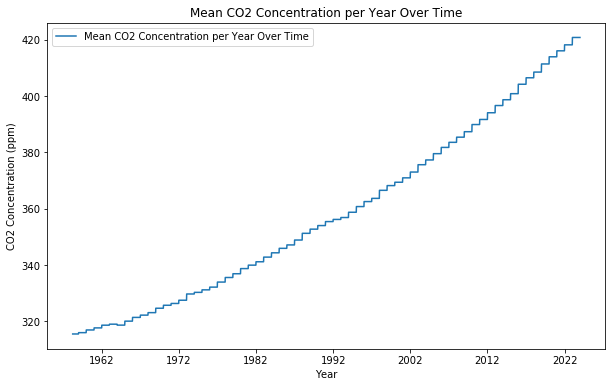

In [10]:
# Contribution lente. Création du graphique pour montrer la concentration moyenne de CO2 par an au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Mean_CO2_Concentration'], label='Mean CO2 Concentration per Year Over Time')
plt.title('Mean CO2 Concentration per Year Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

In [35]:
# Oscillation périodique. Obtencion de la oscilacion et créez une nouvelle colonne 'Oscilation'
data['Oscilation'] = data['Concentration']-data['Mean_CO2_Concentration']
# Affichage des premières lignes des données pour vérification
print(data.head())

        Date  Concentration  Year  Mean_CO2_Concentration  Oscilation
0 1958-03-29         316.19  1958                 315.474       0.716
1 1958-04-05         317.31  1958                 315.474       1.836
2 1958-04-12         317.69  1958                 315.474       2.216
3 1958-04-19         317.58  1958                 315.474       2.106
4 1958-04-26         316.48  1958                 315.474       1.006


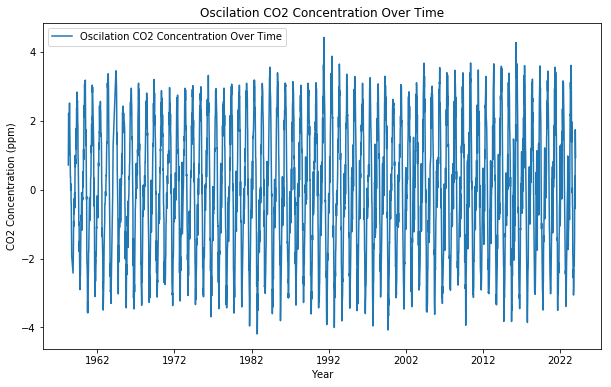

In [12]:
# Oscillation périodique. Création du graphique pour montrer l'oscillation de la concentration de CO2 au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Oscilation'], label='Oscilation CO2 Concentration Over Time')
plt.title('Oscilation CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

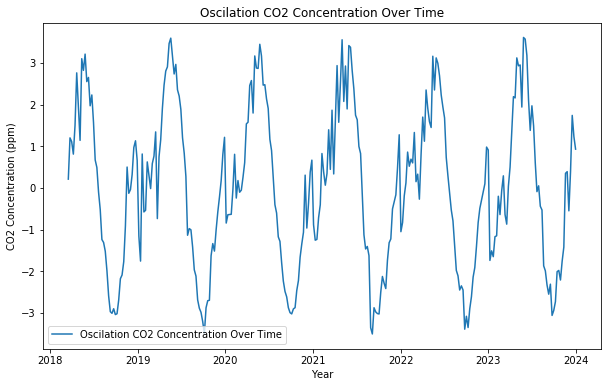

In [13]:
# Oscillation périodique. Création du graphique pour montrer l'oscillation de la concentration de CO2 au fil du temps (300 dernières lignes du tableau)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-300:], data['Oscilation'][-300:], label='Oscilation CO2 Concentration Over Time')
plt.title('Oscilation CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

In [14]:
# Contribution lente. Modéliser la évolution lente pour extrapolation jusqu’en 2025
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
# Contribution lente. Modéliser une évolution lente en utilisant la régression linéaire
X = np.arange(len(data)).reshape(-1, 1)  # Variable indépendante : nombre de semaines
y = data['Mean_CO2_Concentration'].values.reshape(-1, 1) # Variable dépendante : concentration de CO2

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Paramètres du modèle de régression linéaire
# Obtenez les coefficients de régression et l'interception
coeficiente = model.coef_[0][0]
intercepto = model.intercept_[0]

# Obtenir le coefficient de détermination (R²)
r_cuadrado = model.score(X, y)

# Imprimer les paramètres du modèle
print("Regression coefficient:", coeficiente)
print("Intercept:", intercepto)
print("R-squared (R²):", r_cuadrado)
print("It is considered a linear model, or line, that verifies the linear function Y=M.X + H with M: Regression coefficient, H: Intercept, and R-squared (R²): proportion of the total variability of the variable dependent that is explained by the model")

# Prédire la concentration de CO2 en 2025
weeks_in_2025 = (2025 - data['Date'].dt.year.min()) * 52
predicted_CO2_2025 = model.predict([[weeks_in_2025]])

print("Predicted CO2 concentration in 2025:", predicted_CO2_2025[0][0], "ppm")

Regression coefficient: 0.03169965286205089
Intercept: 305.8667902052942
R-squared (R²): 0.9813151125069396
It is considered a linear model, or line, that verifies the linear function Y=M.X + H with M: Regression coefficient, H: Intercept, and R-squared (R²): proportion of the total variability of the variable dependent that is explained by the model
Predicted CO2 concentration in 2025: 416.3083807766795 ppm


In [16]:
# Oscillation périodique. Caractériser l’oscillation
import numpy as np
# from scipy.fft import fft 
# fft de scipy.fft, a des problèmes de chargement, il se peut que nous utilisions une version de SciPy antérieure à 1.4.0. La fonction fft a été ajoutée dans SciPy version 1.4.0.
# Pour résoudre le problème, nous pouvons utiliser la fonction fft de numpy à la place, puisque numpy fournit également des fonctions pour effectuer la transformée de Fourier
print("fft de scipy.fft, a des problèmes de chargement, il se peut que nous utilisions une version de SciPy antérieure à 1.4.0. La fonction fft a été ajoutée dans SciPy version 1.4.0.. Pour résoudre le problème, nous pouvons utiliser la fonction fft de numpy à la place, puisque numpy fournit également des fonctions pour effectuer la transformée de Fourier")

fft de scipy.fft, a des problèmes de chargement, il se peut que nous utilisions une version de SciPy antérieure à 1.4.0. La fonction fft a été ajoutée dans SciPy version 1.4.0.. Pour résoudre le problème, nous pouvons utiliser la fonction fft de numpy à la place, puisque numpy fournit également des fonctions pour effectuer la transformée de Fourier


In [17]:
# Oscillation périodique. Caractériser l’oscillation
# Affichage des premières lignes des données pour vérification
print(data.head())

        Date  Concentration  Year  Mean_CO2_Concentration  Oscilation
0 1958-03-29         316.19  1958                 315.474       0.716
1 1958-04-05         317.31  1958                 315.474       1.836
2 1958-04-12         317.69  1958                 315.474       2.216
3 1958-04-19         317.58  1958                 315.474       2.106
4 1958-04-26         316.48  1958                 315.474       1.006


In [18]:
# Oscillation périodique. Calculer la transformée de Fourier de la série chronologique des anomalies CO2
co2_anomaly_fft = np.fft.fft(data['Oscilation'])

# Calculer les fréquences correspondant aux composantes de Fourier
n = len(data)
frequencies = np.fft.fftfreq(n, d=1)  # Fréquences en cycles par semaine

# Trouver la fréquence et l'amplitude maximales
max_freq_index = np.argmax(np.abs(co2_anomaly_fft))
max_freq = frequencies[max_freq_index]
max_amplitude = np.abs(co2_anomaly_fft[max_freq_index])

print("Dominant oscillation frequency:", max_freq, "cycles/week")
print("Maximum oscillation amplitude in CO2 anomalies:", max_amplitude, "ppm")

Dominant oscillation frequency: 0.019356759976176297 cycles/week
Maximum oscillation amplitude in CO2 anomalies: 3207.2901558554163 ppm


In [19]:
# Oscillation périodique. Comment caractériser l'oscillation en calculant la transformée de Fourier donne des valeurs pas faciles à comprendre a priori, une autre manière est choisie pour caractériser l'oscillation
print("Comment caractériser l'oscillation périodique en calculant la transformée de Fourier donne des valeurs pas faciles à comprendre a priori, une autre manière est choisie pour caractériser l'oscillation")

Comment caractériser l'oscillation périodique en calculant la transformée de Fourier donne des valeurs pas faciles à comprendre a priori, une autre manière est choisie pour caractériser l'oscillation


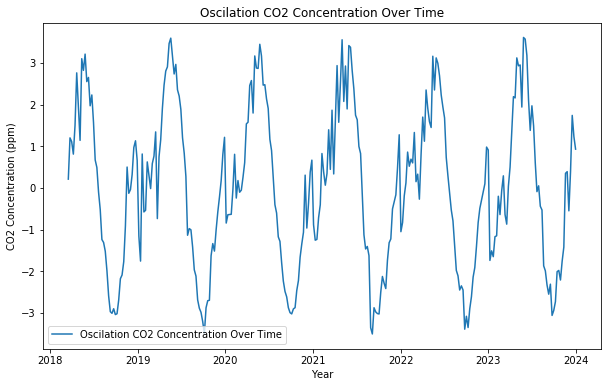

In [20]:
# Oscillation périodique. Création du graphique pour montrer l'oscillation de la concentration de CO2 au fil du temps (300 dernières lignes du tableau)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-300:], data['Oscilation'][-300:], label='Oscilation CO2 Concentration Over Time')
plt.title('Oscilation CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.show()

In [21]:
# Oscillation périodique. Calculez la valeur maximale et minimale de la colonne 'Oscillation'
maximum_value = data['Oscilation'].max()
minimum_value = data['Oscilation'].min()

print("Maximum oscillation amplitude in CO2 anomalies:", maximum_value, "ppm")
print("Minimum oscillation amplitude in CO2 anomalies:", minimum_value, "ppm")
print("From the graph it is observed that maximum oscillation values around 3 ppm are frequent and the same is true for minimum oscillation values around -3 ppm")

Maximum oscillation amplitude in CO2 anomalies: 4.419807692307586 ppm
Minimum oscillation amplitude in CO2 anomalies: -4.191923076923047 ppm
From the graph it is observed that maximum oscillation values around 3 ppm are frequent and the same is true for minimum oscillation values around -3 ppm


In [22]:
# Oscillation périodique. Trouver les indices où la concentration est égale à zéro
zero_indices = data.index[data['Oscilation'] == 0].tolist()

# Calculer les temps entre deux passages à zéro consécutifs
times_between_steps = []
for i in range(1, len(zero_indices)):
    time_between_steps = data.iloc[zero_indices[i]]['Date'] - data.iloc[zero_indices[i-1]]['Date']
    times_between_steps.append(time_between_steps)

# Calculer le temps moyen entre les passages à zéro
# average_time_between_steps = sum(times_between_steps, pd.Timedelta(0)) / len(times_between_steps)

# print("Average time between zero steps:", average_time_between_steps)
print("Cette forme de détermination ne donne pas de résultats car les données de concentration de CO2 de l'oscillation ne valent pas zéro mais ont de faibles valeurs, à la fois positives et négatives, donc la méthode correcte doit détecter ces passages par zéro")

Cette forme de détermination ne donne pas de résultats car les données de concentration de CO2 de l'oscillation ne valent pas zéro mais ont de faibles valeurs, à la fois positives et négatives, donc la méthode correcte doit détecter ces passages par zéro


In [23]:
# Oscillation périodique. Identifier les passages à zéro
crosses_by_zero = (data['Oscilation'] * data['Oscilation'].shift(1) < 0) & (data['Oscilation'] != 0) # Série booléenne qui contient True dans les lignes où un passage à zéro se produit dans la colonne « Oscilation » du DataFrame et False dans les autres lignes. Cette série est ensuite utilisée pour filtrer le DataFrame et obtenir les lignes qui correspondent aux passages par zéro

# Filtrer les lignes contenant des passages à zéro
data_crosses_by_zero = data[crosses_by_zero]

# Calculer les temps entre les passages à zéro consécutifs
times_between_crosses = data_crosses_by_zero['Date'].diff().mean()

print("Average time between zero crossings:", times_between_crosses)

Average time between zero crossings: 69 days 15:11:01.224489


# Subject 4: Latency and capacity estimation for a network connection from asymmetric measurements


In [24]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [25]:
# Importation des bibliothèques nécessaires
url_liglab2 = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz"
url_stackoverflow = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/stackoverflow.log.gz"

# Charger les données dans un DataFrame pandas
df_liglab2 = pd.read_csv(url_liglab2, sep=" ", header=None)
df_stackoverflow = pd.read_csv(url_stackoverflow, sep=" ", header=None)

In [26]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())


                     0     1      2     3                   4               5  \
0  [1421761682.052172]   665  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
1  [1421761682.277315]  1373  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
2  [1421761682.502054]   262  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
3  [1421761682.729257]  1107  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
4  [1421761682.934648]  1128  bytes  from  lig-publig.imag.fr  (129.88.11.7):   

            6       7          8   9  
0  icmp_seq=1  ttl=60  time=22.5  ms  
1  icmp_seq=1  ttl=60  time=21.2  ms  
2  icmp_seq=1  ttl=60  time=21.2  ms  
3  icmp_seq=1  ttl=60  time=23.3  ms  
4  icmp_seq=1  ttl=60  time=1.41  ms  


In [27]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                     0     1      2     3                  4  \
0  [1421771203.082701]  1257  bytes  from  stackoverflow.com   
1  [1421771203.408254]   454  bytes  from  stackoverflow.com   
2  [1421771203.739730]   775  bytes  from  stackoverflow.com   
3  [1421771204.056630]  1334  bytes  from  stackoverflow.com   
4  [1421771204.372224]    83  bytes  from  stackoverflow.com   

                    5           6       7         8   9  
0  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  time=126  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  time=112  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  time=111  ms  


In [28]:
import numpy as np

# Définir une fonction pour extraire les informations pertinentes de chaque ligne
def process_ping_data(df):
    df.dropna(inplace=True)  # Supprimer les lignes incomplètes
    df.columns = ["date", "size", "bytes", "from", "url", "ip", "icmp","ttl","time", "ms"]  # Nommez les colonnes
    df["time"] = df["time"].str[5:].astype(float)  # Extraire le temps en ms et convertir en float (supprimer la chaîne "time-")
    df["date"] = df["date"].str[1:18] # Les [ ] sont supprimés donc la date est extraite de la première colonne
    df["date"] = pd.to_datetime(df["date"], unit='s') # La date obtenue précédemment est convertie au format "datetime"
    return df

# Traiter les données ping pour liglab2 et stackoverflow
df_liglab2 = process_ping_data(df_liglab2)
df_stackoverflow = process_ping_data(df_stackoverflow)


In [29]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())

                        date  size  bytes  from                 url  \
0 2015-01-20 13:48:02.052172   665  bytes  from  lig-publig.imag.fr   
1 2015-01-20 13:48:02.277315  1373  bytes  from  lig-publig.imag.fr   
2 2015-01-20 13:48:02.502054   262  bytes  from  lig-publig.imag.fr   
3 2015-01-20 13:48:02.729257  1107  bytes  from  lig-publig.imag.fr   
4 2015-01-20 13:48:02.934648  1128  bytes  from  lig-publig.imag.fr   

               ip        icmp     ttl   time  ms  
0  (129.88.11.7):  icmp_seq=1  ttl=60  22.50  ms  
1  (129.88.11.7):  icmp_seq=1  ttl=60  21.20  ms  
2  (129.88.11.7):  icmp_seq=1  ttl=60  21.20  ms  
3  (129.88.11.7):  icmp_seq=1  ttl=60  23.30  ms  
4  (129.88.11.7):  icmp_seq=1  ttl=60   1.41  ms  


In [30]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                        date  size  bytes  from                url  \
0 2015-01-20 16:26:43.082701  1257  bytes  from  stackoverflow.com   
1 2015-01-20 16:26:43.408254   454  bytes  from  stackoverflow.com   
2 2015-01-20 16:26:43.739730   775  bytes  from  stackoverflow.com   
3 2015-01-20 16:26:44.056630  1334  bytes  from  stackoverflow.com   
4 2015-01-20 16:26:44.372224    83  bytes  from  stackoverflow.com   

                   ip        icmp     ttl   time  ms  
0  (198.252.206.140):  icmp_seq=1  ttl=50  120.0  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  120.0  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  126.0  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  112.0  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  111.0  ms  


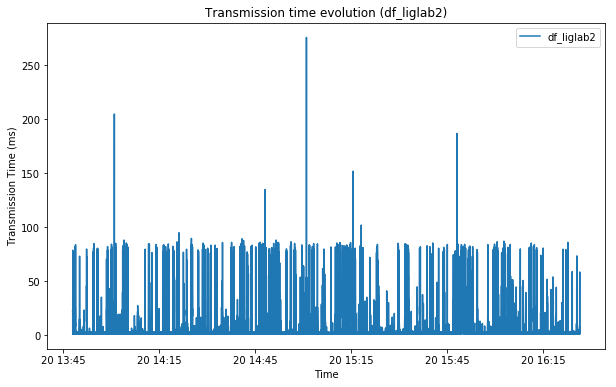

In [31]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["date"], df_liglab2["time"], label="df_liglab2")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_liglab2)")
plt.legend()
plt.show()

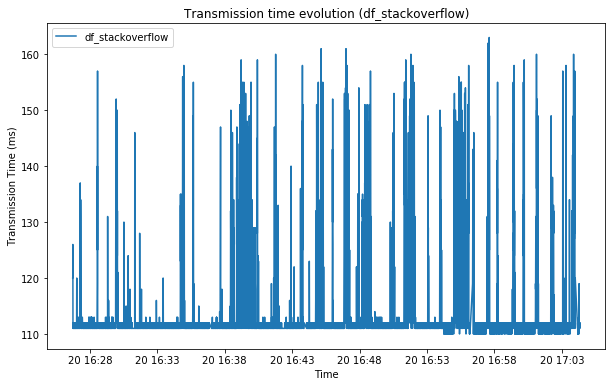

In [32]:
# Graphique du temps de transmission dans le temps
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["date"], df_stackoverflow["time"], label="df_stackoverflow")
plt.xlabel("Time")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()

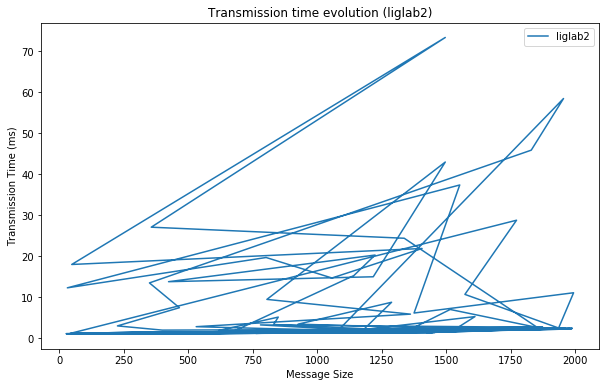

In [33]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["size"][-300:], df_liglab2["time"][-300:], label="liglab2")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (liglab2)")
plt.legend()
plt.show()

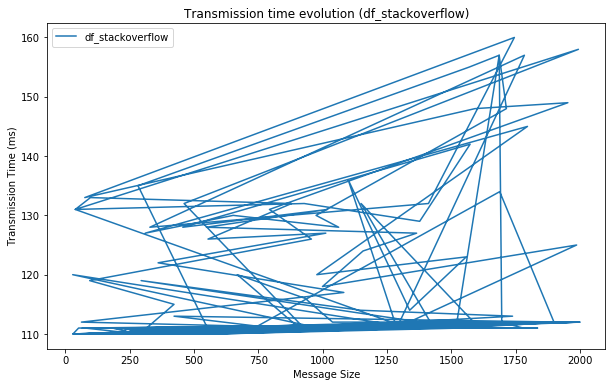

In [34]:
# Graph of transmission time based on message size
plt.figure(figsize=(10, 6))
plt.plot(df_stackoverflow["size"][-300:], df_stackoverflow["time"][-300:], label="df_stackoverflow")
plt.xlabel("Message Size")
plt.ylabel("Transmission Time (ms)")
plt.title("Transmission time evolution (df_stackoverflow)")
plt.legend()
plt.show()